## Choropleth Maps with Spatial Data in R
Color-coded choropleth maps in R using rgdal and ggplot2. Two examples are included here: crime levels using a map of neighborhoods San Franisco and frequency using a map of parishes in Uganda. Includes GIS shapefile manipulation and heat mapping.



# Example 1: Exploring agriculture in Uganda

This project was done for a post-doctoral researcher studying agriculture in Uganda. We were given an unclean frequency table of farm counts in different areas of Uganda, and we found a spatial dataset containing the different administrative structures throughout the country. The administrative subdivisons in Uganda go region > districts > subcounties > parishes > city/village. The frequency table contains both parishes and city/villages, and we wish to map our frequency table to a color-coded choropleth made with the spatial dataset. Parishes will be color-coded according to farm frequency, and villages in the table will be counted towards the parish to which it belongs. 

Starting with opening our spatial dataset:

In [2]:
library(rgdal)
library(plyr)

africa=readOGR(dsn=".", layer="Uganda_parish2010")

Loading required package: sp
rgdal: version: 1.2-20, (SVN revision 725)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 1.11.3, released 2015/09/16
 Path to GDAL shared files: /usr/share/gdal/1.11
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.2, 08 September 2015, [PJ_VERSION: 492]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-7 


OGR data source with driver: ESRI Shapefile 
Source: "/home/rob/ml/chlo", layer: "Uganda_parish2010"
with 6255 features
It has 26 fields


We can see below that the dataset contains many superfluous features. We really only will be paying attention to 'PNAME2010', which represents the parish name.

In [3]:
summary(africa)

Object of class SpatialPolygonsDataFrame
Coordinates:
        min      max
x 118484.04 722525.5
y  36309.76 668071.0
Is projected: TRUE 
proj4string :
[+proj=tmerc +lat_0=0 +lon_0=33 +k=0.9996 +x_0=500000 +y_0=200000
+datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0]
Data attributes:
    DNAME_2002      D_02_ID                     CNAME_2002      C_02_ID    
 KUMI    : 276   Min.   :101.0   BUKOOLI             : 132   Min.   :1011  
 MBARARA : 272   1st Qu.:201.0   NGORA               : 108   1st Qu.:2011  
 ARUA    : 255   Median :214.0   KAMPALA CITY COUNCIL:  99   Median :2141  
 BUSHENYI: 224   Mean   :256.2   KUMI                :  97   Mean   :2564  
 LIRA    : 222   3rd Qu.:401.0   BUSIRO              :  96   3rd Qu.:4011  
 MUKONO  : 195   Max.   :415.0   BUNYA               :  93   Max.   :4152  
 (Other) :4811                   (Other)             :5630                 
            SNAME_2002      S_02_ID                     PNAME_2002  
 KAPIR           :  34   Min.

The frequency table mostly comes from six districts. Since the spatial dataset covers every parish in Uganda, so we can just extract the parishes we need from their relevant districts. The six districts are:

In [4]:
dists = c("ABIM", "AGAGO", "AMURIA", "KABERAMAIDO", "NGORA", "SERERE")

The problem two of these districts, Ngora and Serere, weren't created until June 2010. The subcounties and parishes that presently make up these two districts existed as part of other districts at the time. 

Looking at the dataset below, we see that only the first four are recognized as districts, meaning this spatial dataset we have is unfortunately using the parish boundaries from before Uganda's district rezoning in June 2010:

In [7]:
from_dists <- africa[africa@data$DNAME_2010 %in% dists, ]
from_dists@data$DNAME_2010

[1] AGAGO       AGAGO       AGAGO       AGAGO       AGAGO       AGAGO      
  [7] AGAGO       AGAGO       AGAGO       AGAGO       AGAGO       AGAGO      
 [13] AGAGO       AGAGO       AGAGO       AGAGO       AGAGO       AGAGO      
 [19] AGAGO       AGAGO       AGAGO       AGAGO       AGAGO       AGAGO      
 [25] AGAGO       AGAGO       AGAGO       AGAGO       AGAGO       AGAGO      
 [31] AGAGO       AGAGO       AGAGO       AGAGO       AGAGO       AGAGO      
 [37] AGAGO       AGAGO       AGAGO       AGAGO       AGAGO       ABIM       
 [43] ABIM        ABIM        ABIM        ABIM        ABIM        ABIM       
 [49] ABIM        ABIM        ABIM        ABIM        ABIM        ABIM       
 [55] ABIM        ABIM        ABIM        ABIM        ABIM        ABIM       
 [61] ABIM        ABIM        KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO
 [67] KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO
 [73] KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO
 [79] KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO
 [85] KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO
 [91] KABERAMAIDO KABERAMAIDO KABERAMAIDO AMURIA      AMURIA      AMURIA     
 [97] AMURIA      AMURIA      AMURIA      AMURIA      AMURIA      AMURIA     
[103] AMURIA      AMURIA      AMURIA      AMURIA      AMURIA      AMURIA     
[109] AMURIA      AMURIA      AMURIA      AMURIA      AMURIA      AMURIA     
[115] AMURIA      AMURIA      AMURIA      AMURIA      AMURIA      AMURIA     
[121] AMURIA      AMURIA      AMURIA      AMURIA      AMURIA      AMURIA     
[127] AMURIA      AMURIA      AMURIA      AMURIA      AMURIA      AMURIA     
[133] AMURIA      AMURIA      AMURIA      AMURIA      AMURIA      AMURIA     
[139] KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO
[145] KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO KABERAMAIDO
[151] KABERAMAIDO KABERAMAIDO AMURIA      AMURIA      AGAGO      
99 Levels: ABIM ADJUMANI AGAGO AMOLATAR AMUDAT AMURIA AMURU APAC ARUA ... YUMBE

Fortunately, however, if we look up the subcounties from Ngora and Serere, it looks like that only the parishes were moved into new districts, but the parish boundaries themselves weren't changed. We can retrieve all the parishes by indexing through the subcounties in Ngora and Serere instead. I collected the subcounty names from:

http://www.lcmt.org/uganda/ngora, http://www.lcmt.org/uganda/serere

In [8]:
subcounties = c("KAPIR", "KOBWIN", "MUKURA", "NGORA", "ATIIRA", "BUGONDO", "KADUNGULU", "KATETA", 
                "KYERE", "OLIO", "PINGIRE")
from_subcount <- africa[africa@data$SNAME_2010 %in% subcounties, ]
from_subcount@data$DNAME_2010

[1] SOROTI KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI  
 [11] KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI  
 [21] KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI  
 [31] KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI  
 [41] KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI  
 [51] KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI  
 [61] KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   SOROTI SOROTI SOROTI
 [71] SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI
 [81] SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI
 [91] SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI KUMI   KUMI   KUMI   KUMI  
[101] KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI  
[111] KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI  
[121] KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI  
[131] KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   KUMI   SOROTI SOROTI
[141] SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI
[151] SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI
[161] SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI
[171] SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI SOROTI
99 Levels: ABIM ADJUMANI AGAGO AMOLATAR AMUDAT AMURIA AMURU APAC ARUA ... YUMBE

It appears that the subcounties that are currently considered part of the Ngora and Serere districts were formerly part of the Kumi and Soroti districts respectively. This lines up with the article saying that these districts were originally split: 

https://en.wikipedia.org/wiki/Ngora_District, 
https://en.wikipedia.org/wiki/Serere_District


Now we can make a regional plot by taking the parishes from the main dataset into its own dataframe. That way we can narrow down our parish search to only those parishes from the proper districts and subcounties. Here I am just subsetting the dataset with both the specified names from the first four districts and from the list of subcounties from the last two districts.

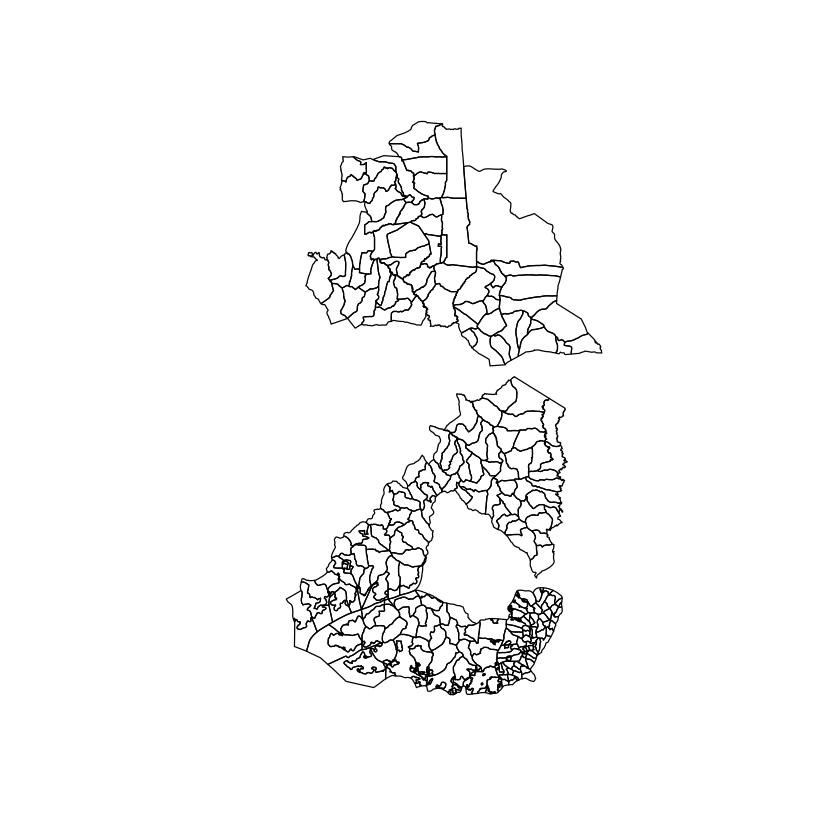

In [9]:
farmer_map <- africa[africa@data$DNAME_2010 %in% dists | africa@data$SNAME_2010 %in% subcounties, ]
plot(farmer_map)

Just as a quick sanity check, we can make a color-coded map based on region.

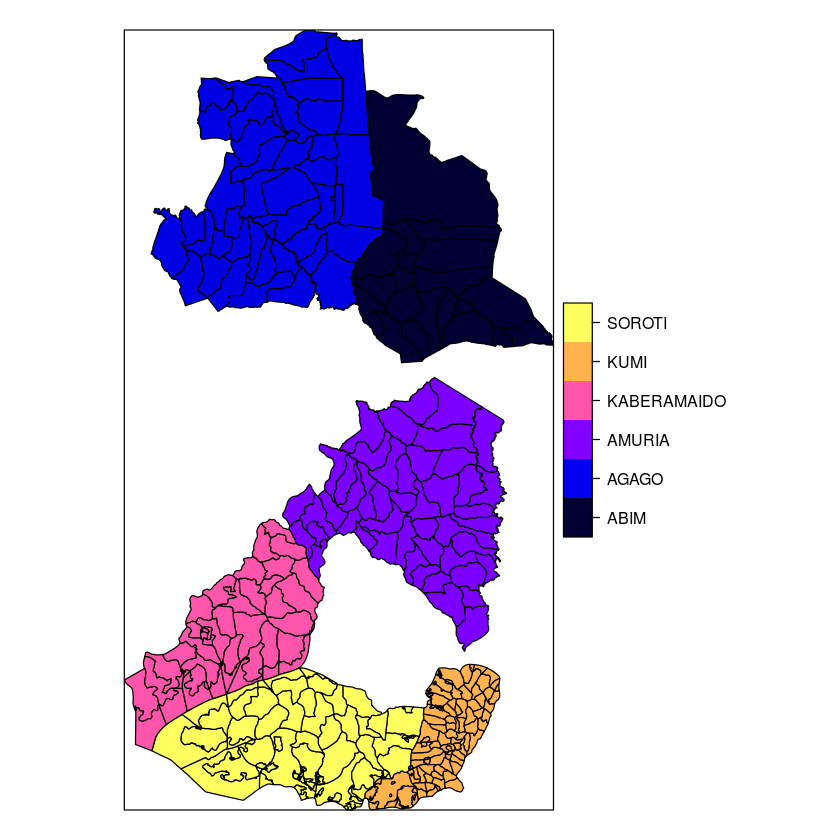

In [10]:
region_map <- farmer_map
region_map@data <- farmer_map@data[c("DNAME_2010")]
region_map@data$DNAME_2010 <- factor(region_map@data$DNAME_2010)
spplot(region_map, "DNAME_2010")

Next task is to populate our farmer_map table with frequencies from our frequency table. We can start by droping the unnecessary columns and sorting by parish name for easy of access. Lastly, we'll add a column for the number of farmers that we'll begin to fill in.

In [13]:
keeps <- c("PNAME_2010", "DNAME_2010", "AREA", "PERIMETER", "SNAME_2010", "SUBREGION", "FTYPE")
farmer_map@data <- farmer_map@data[keeps]
farmer_map@data <- farmer_map@data [order (farmer_map@data$PNAME_2010), ]
farmer_map@data[,"NUM_FARMERS"] <- NA
head(farmer_map@data)

,PNAME_2010,DNAME_2010,AREA,PERIMETER,SNAME_2010,SUBREGION,FTYPE,NUM_FARMERS
3640,AARAPOO,SOROTI,66831649,66822.45,PINGIRE,TESO,Populated Area,NA
5335,AARAPOO,SOROTI,140046794,111887.84,PINGIRE,TESO,Water,NA
3695,ABALANG,KABERAMAIDO,46320817,40552.56,ALWA,TESO,Populated Area,NA
3570,ABATAI,KUMI,13004831,16550.00,KAPIR,TESO,Populated Area,NA
3807,ABEKO,AMURIA,22896106,24066.54,MORUNGATUNY,TESO,Populated Area,NA
3794,ABIA,AMURIA,57209973,41112.81,KUJU,TESO,Populated Area,NA


Now we'll load in our frequency table. We need to format the parish names by extracting just the information before the comma, clipping off the district and the country. We'll also convert it to uppercase. So initially the data looks like this:

In [14]:
freq <- read.csv("parishdistrictfreq.csv")
head(freq)

ParDistUg,Freq
"Abalang, Kaberamaido, Uganda",206
"Abatai, Ngora, Uganda",17
"Abenyo, Kaberamaido, Uganda",63
"Abolana, Kaberamaido, Uganda",1
"Abongatin, Amuria, Uganda",7
"Abunga, Amuria, Uganda",1


And now just to do some string cleaning to get the format to match that of the spatial dataset:

In [17]:
parish_freq <- rapply(list(freq$ParDistUg),function(x) sub(',.*$','', x), how = "replace")
parish_freq <- sapply(parish_freq, toupper)
freq$ParDistUg <- parish_freq
head(freq)

ParDistUg,Freq
ABALANG,206
ABATAI,17
ABENYO,63
ABOLANA,1
ABONGATIN,7
ABUNGA,1


The big task is to match the objects in the frequency table to the objects in the spatial dataset. The problem is that things are not a one-to-one match. The problems presented to us are: 1) there are some spelling discrepancies between the two datasets, 2) not every parish in the spatial dataset is present in the frequency table and vice versa, 3) some of the objects in the frequency table actually represent villages, an administrative unit not present in the spatial dataset, and need to be manually imputed, and 4) a small number of the parishes in the frequency table come from different districts than the ones listed above.

Fuzzy match match would really only take care of number one, so unfortunately, it's easiest just to manually impute the dataset. We'll start with a ddply function to automatically sum up any of the duplicates.

In [18]:
freq$ParDistUg <- parish_freq

And here is the grand list of manual imputations:

In [19]:
# renaming of columns
freq[freq$ParDistUg == "ABOLANA",][,1] <- "OBUR"
freq[freq$ParDistUg == "ACANPI",][,1] <- "ACHANPI"
freq[freq$ParDistUg == "ACANPI PARISH",][,1] <- "ACHANPI"
freq[freq$ParDistUg == "ADAKUN",][,1] <- "ORUNGO"
freq[freq$ParDistUg == "ADWENYI",][,1] <- "KADUNGULU"
freq[freq$ParDistUg == "AITA",][,1] <- "OGANGI"
freq[freq$ParDistUg == "AIITA",][,1] <- "OGANGI"
freq[freq$ParDistUg == "AKOROI",][,1] <- "KOMODO"
freq[freq$ParDistUg == "AKOYO",][,1] <- "AKERIAU"
freq[freq$ParDistUg == "AKUMOI",][,1] <- "ODAPAKOL"
freq[freq$ParDistUg == "ALOKODUM",][,1] <- "AKERIAU"
freq[freq$ParDistUg == "ANYALAM",][,1] <- "KANYALAM"
freq[freq$ParDistUg == "APAMA",][,1] <- "MPAMA"
freq[freq$ParDistUg == "APERKIRA",][,1] <- "OLELAI"
freq[freq$ParDistUg == "APERKIRA PARISH",][,1] <- "OLELAI"
freq[freq$ParDistUg == "ARUBELA",][,1] <- "OPOT"
freq[freq$ParDistUg == "ATALI",][,1] <- "ABALODYANGA"
freq[freq$ParDistUg == "AWIJOBI",][,1] <- "ADONYOIMO"
freq[freq$ParDistUg == "BARLYECH",][,1] <- "OPOROTH"
freq[freq$ParDistUg == "EASTERN WARD",][,1] <- "NGORA"
freq[freq$ParDistUg == "GAWA",][,1] <- "TILLING"
freq[freq$ParDistUg == "GOTAPWOU",][,1] <- "AWACH"
freq[freq$ParDistUg == "KABERKOLE",][,1] <- "OPILITOK"
freq[freq$ParDistUg == "KADOK",][,1] <- "KADOKI"
freq[freq$ParDistUg == "KAGA",][,1] <- "KAGAA"
freq[freq$ParDistUg == "KAGGA",][,1] <- "KAGAA"
freq[freq$ParDistUg == "KATABOK WEST",][,1] <- "KATABOK"
freq[freq$ParDistUg == "KOBULIN",][,1] <- "OPOPONGO"
freq[freq$ParDistUg == "KOBWI JUWAI",][,1] <- "KOBIN"
freq[freq$ParDistUg == "KOILE",][,1] <- "KADOKI"
freq[freq$ParDistUg == "LABWAR",][,1] <- "LABWA"
freq[freq$ParDistUg == "LABWO",][,1] <- "LABWA"
freq[freq$ParDistUg == "LAPONO MUK",][,1] <- "LAPONO OMUK"
freq[freq$ParDistUg == "LAPOW MUK",][,1] <- "LAPONO OMUK"
freq[freq$ParDistUg == "LIRA KATO",][,1] <- "LIRAKATO"
freq[freq$ParDistUg == "LIRA KAYO",][,1] <- "LIRAKATO"
freq[freq$ParDistUg == "MORU INERA",][,1] <- "MORUINERA"
freq[freq$ParDistUg == "MORUNERA",][,1] <- "MORUINERA"
freq[freq$ParDistUg == "MUKARA",][,1] <- "MUKURA"
freq[freq$ParDistUg == "NOTHERN WARD",][,1] <- "NGORA"
freq[freq$ParDistUg == "ODUDUI",][,1] <- "OKUDE"
freq[freq$ParDistUg == "ODUNGURA",][,1] <- "OBURIN"
freq[freq$ParDistUg == "OGWOOLO",][,1] <- "OGWOLO"
freq[freq$ParDistUg == "OGANGI",][,1] <- "OGANGAI"
freq[freq$ParDistUg == "OJUKAI",][,1] <- "ATOOT"
freq[freq$ParDistUg == "OJUKOT",][,1] <- "AMORU"
freq[freq$ParDistUg == "OKUNLONYO",][,1] <- "OKULONYO"
freq[freq$ParDistUg == "OLUKANGOR",][,1] <- "KOCOCWA"
freq[freq$ParDistUg == "OMAGARA",][,1] <- "KATETA"
freq[freq$ParDistUg == "OMORATOK",][,1] <- "OCHELAKUR"
freq[freq$ParDistUg == "ORETHA",][,1] <- "ORETA"
freq[freq$ParDistUg == "OTUBET",][,1] <- "OKUDE"
freq[freq$ParDistUg == "PUPU KAMUYA",][,1] <- "PUPUKAMUYA"
freq[freq$ParDistUg == "TEMELE",][,1] <- "AKERIAU"
freq[freq$ParDistUg == "TILLING OJOGOL",][,1] <- "OMOO"
freq[freq$ParDistUg == "TOROR",][,1] <- "OGERA"
freq[freq$ParDistUg == "WESTERN WARD",][,1] <- "NGORA"

# unsure about these ones
freq[freq$ParDistUg == "ARUTE",][,1] <- "DODOS"
freq[freq$ParDistUg == "AYOLA",][,1] <- "AJAKI"
freq[freq$ParDistUg == "KULAKA",][,1] <- "LALAL"
freq[freq$ParDistUg == "LIGI LIGI",][,1] <- "NGEKIDI"
freq[freq$ParDistUg == "LIGILIGI",][,1] <- "NGEKIDI"
freq[freq$ParDistUg == "LIGI-LIGI",][,1] <- "NGEKIDI"
freq[freq$ParDistUg == "OBUKU",][,1] <- "AMEN"
freq[freq$ParDistUg == "ORAPADA",][,1] <- "MORUKAKISE"
freq[freq$ParDistUg == "ORIAMO",][,1] <- "KAMUDA"

# villages that are both mispelled and incorrectly classified
freq[freq$ParDistUg == "ABENYO",][,1] <- "ANGWECIBANGE"
freq[freq$ParDistUg == "ABONGATIN",][,1] <- "ABONGOATIN"
freq[freq$ParDistUg == "AMENYA",][,1] <- "KAMENYA"
freq[freq$ParDistUg == "LAPYIM",][,1] <- "LAPYEM"

In [20]:
farmer_map <- africa[africa@data$DNAME_2010 %in% dists | africa@data$SNAME_2010 %in% subcounties, ]

# import parishes from other districts
farmer_map <- rbind(farmer_map, africa[africa@data$PNAME_2010 == "ANGWECIBANGE",])
farmer_map <- rbind(farmer_map, africa[africa@data$PNAME_2010 == "ABONGOATIN",])
farmer_map <- rbind(farmer_map, africa[africa@data$PNAME_2010 == "ALIGOI",])
farmer_map <- rbind(farmer_map, africa[africa@data$PNAME_2010 == "KAMENYA",])
farmer_map <- rbind(farmer_map, africa[africa@data$PNAME_2010 == "ADONYOIMO",])
farmer_map <- rbind(farmer_map, africa[africa@data$PNAME_2010 == "ABALODYANGA",])
farmer_map <- rbind(farmer_map, africa[africa@data$PNAME_2010 == "AWIRI",])
farmer_map <- rbind(farmer_map, africa[africa@data$PNAME_2010 == "LAPYEM",])
farmer_map <- rbind(farmer_map, africa[africa@data$PNAME_2010 == "AMEN",])
farmer_map <- rbind(farmer_map, africa[africa@data$PNAME_2010 == "OGOOMA",])

Add these all up again to get the grand totals with ddply:

In [21]:
freq <- ddply(freq,"ParDistUg",numcolwise(sum))

Now that we've fixed the data, we can just use a simple double for loop to check eac item in the spatial dataset for a corresponding match in the frequency table, and adds these matches to another column.

In [26]:
keeps <- c("PNAME_2010", "DNAME_2010", "AREA", "PERIMETER", "SNAME_2010", "SUBREGION", "FTYPE")
farmer_map@data <- farmer_map@data[keeps]
farmer_map@data <- farmer_map@data [order (farmer_map@data$PNAME_2010), ]
farmer_map@data[,"NUM_FARMERS"] <- NA
head(farmer_map@data)

,PNAME_2010,DNAME_2010,AREA,PERIMETER,SNAME_2010,SUBREGION,FTYPE,NUM_FARMERS
3640,AARAPOO,SOROTI,66831649,66822.45,PINGIRE,TESO,Populated Area,NA
5335,AARAPOO,SOROTI,140046794,111887.84,PINGIRE,TESO,Water,NA
3695,ABALANG,KABERAMAIDO,46320817,40552.56,ALWA,TESO,Populated Area,NA
4093,ABALODYANGA,AMOLATAR,26569044,27975.97,APUTI,LANGO,Populated Area,NA
3570,ABATAI,KUMI,13004831,16550.00,KAPIR,TESO,Populated Area,NA
3807,ABEKO,AMURIA,22896106,24066.54,MORUNGATUNY,TESO,Populated Area,NA


In [27]:
freq$Found <- FALSE
for (i in 1:length(farmer_map@data$PNAME_2010)) {
    for (j in 1:length(freq$Freq)) {
        if (farmer_map@data$PNAME_2010[i] == freq$ParDistUg[j]) {
            farmer_map@data$freq[i] <- freq$Freq[j]
            freq$Found[j] <- TRUE
        }
    }
}

And we are done! Now using ssplot to plot the final map:

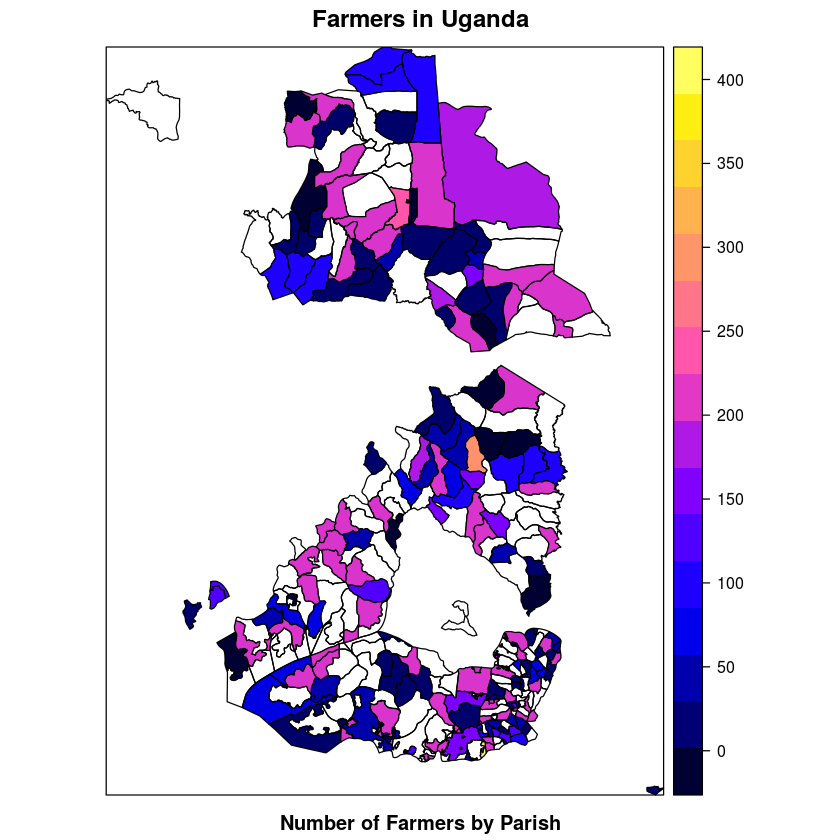

In [28]:
spplot(farmer_map, "freq", main = "Farmers in Uganda", sub = "Number of Farmers by Parish") 

# Example 2: Plotting crime data by neighborhood in San Francisco

The data for this project will be obtained from San Francisco's open data initiative, found in the following link: 

https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry

In [23]:
library(sp)
library(plyr)
library(dplyr)
library(dummies)
library(caret)
library(ggplot2)
library(rgeos)
library(maptools)
library(RColorBrewer)

crime_17 = read.csv("sf_incidents17.csv")
crime_points = crime_17

The first step is to pre-process our crime data. The data obtained from the website looks like the following:

In [24]:
head(crime_17)

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
150333505,WARRANTS,WARRANT ARREST,Wednesday,04/19/2017,21:29,MISSION,"ARREST, BOOKED",24TH ST / BRYANT ST,-122.4091,37.75280,"(37.752796998558445, -122.40913193948903)",1.503335e+13
141091334,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",Wednesday,03/08/2017,14:28,SOUTHERN,NONE,800 Block of BRYANT ST,-122.4034,37.77542,"(37.775420706711, -122.40340479147905)",1.410913e+13
160913272,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Tuesday,09/12/2017,09:00,MISSION,UNFOUNDED,2700 Block of 16TH ST,-122.4142,37.76533,"(37.76532508532617, -122.414222704763)",1.609133e+13
150045716,WEAPON LAWS,POSS OF FIREARM BY CONVICTED FELON/ADDICT/ALIEN,Thursday,06/01/2017,08:51,INGLESIDE,"ARREST, BOOKED",100 Block of BALTIMORE WY,-122.4318,37.70911,"(37.70910662750824, -122.43184152371002)",1.500457e+13
150333505,WEAPON LAWS,POSS OF FIREARM BY CONVICTED FELON/ADDICT/ALIEN,Wednesday,04/19/2017,21:29,MISSION,"ARREST, BOOKED",24TH ST / BRYANT ST,-122.4091,37.75280,"(37.752796998558445, -122.40913193948903)",1.503335e+13
150333505,WEAPON LAWS,POSS OF LOADED FIREARM,Wednesday,04/19/2017,21:29,MISSION,"ARREST, BOOKED",24TH ST / BRYANT ST,-122.4091,37.75280,"(37.752796998558445, -122.40913193948903)",1.503335e+13


Now we will convert the X- and Y-coordinates from our dataset into a SpatialPoints object. We will also load in our GeoJSON file that has the boundaries for the different districts in San Francisco. Our goal is to do a spatial join between the two.

In [25]:
coordinates(crime_points) <- ~X+Y
crime_points = SpatialPoints(crime_points)

zips_shapes <- rgdal::readOGR("zipcodes_geo.json", "OGRGeoJSON")

OGR data source with driver: GeoJSON 
Source: "/home/rob/ml/chlo/zipcodes_geo.json", layer: "OGRGeoJSON"
with 32 features
It has 12 fields


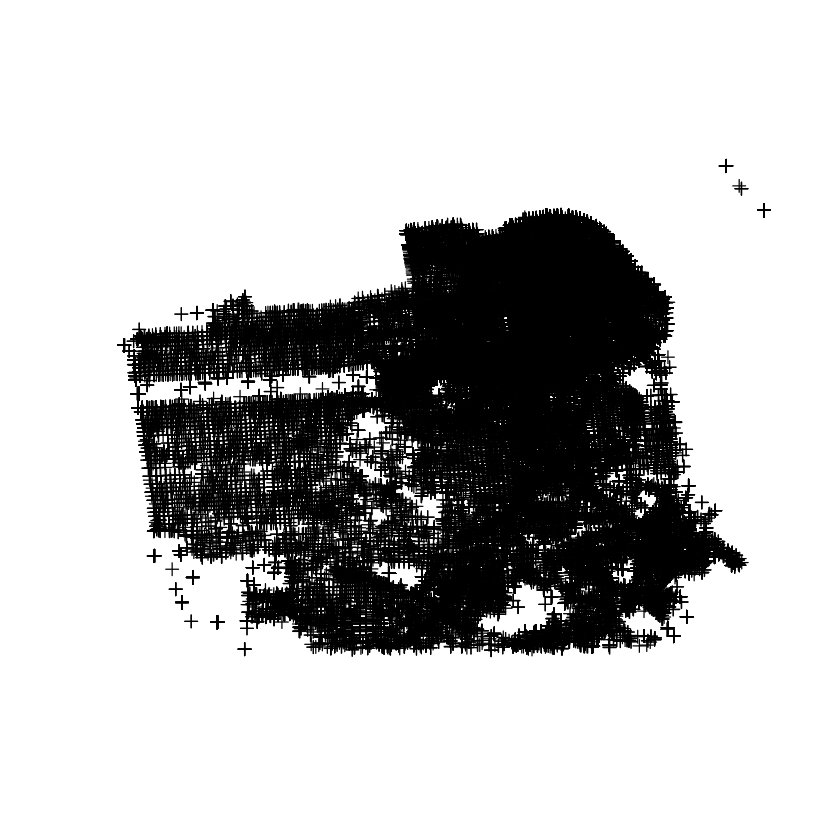

In [26]:
plot(crime_points)

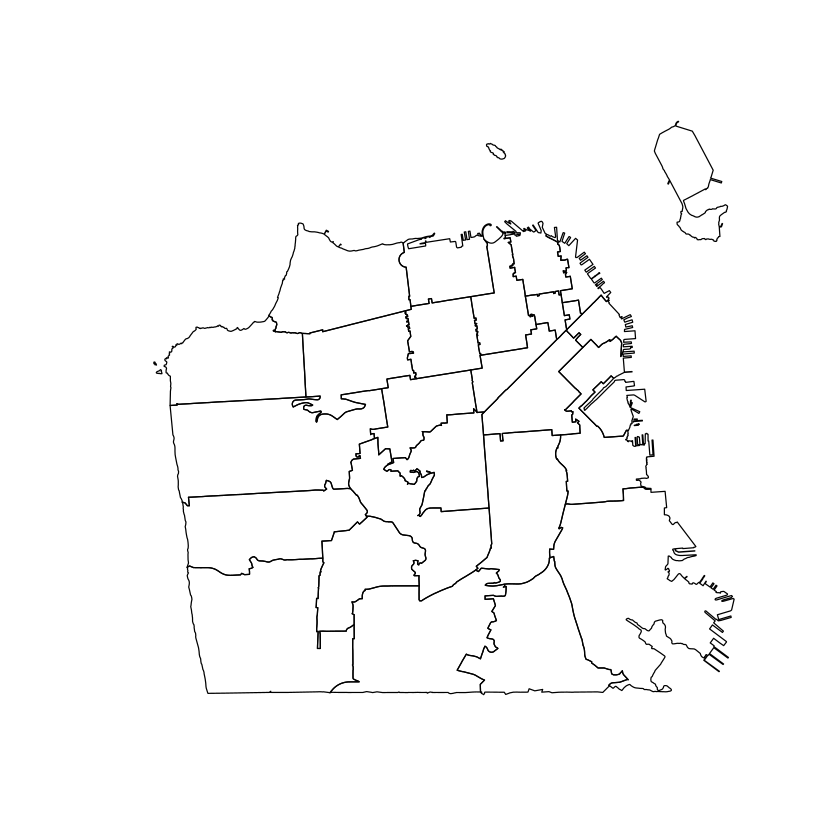

In [27]:
plot(zips_shapes)

Now we need to convert the convert CRS for both dataframes, then do our spatial join across dataframes to obtain zip code vector for the main crimes dataset.

In [28]:
CRS.new<-CRS("+proj=longlat +datum=WGS84")
proj4string(crime_points) <- CRS.new 
proj4string(zips_shapes) <- CRS.new

zips = over(crime_points, zips_shapes)$zip
crime_17$zip_code = zips

Warning message in `proj4string<-`(`*tmp*`, value = <S4 object of class structure("CRS", package = "sp")>):
“A new CRS was assigned to an object with an existing CRS:
+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0
without reprojecting.
For reprojection, use function spTransform”

If we look at our crime data, our crime dataset now has a zipcode column that was obtained from the point coordinates.

In [29]:
head(crime_17)

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,zip_code
150333505,WARRANTS,WARRANT ARREST,Wednesday,04/19/2017,21:29,MISSION,"ARREST, BOOKED",24TH ST / BRYANT ST,-122.4091,37.75280,"(37.752796998558445, -122.40913193948903)",1.503335e+13,94110
141091334,BURGLARY,"BURGLARY OF STORE, FORCIBLE ENTRY",Wednesday,03/08/2017,14:28,SOUTHERN,NONE,800 Block of BRYANT ST,-122.4034,37.77542,"(37.775420706711, -122.40340479147905)",1.410913e+13,94103
160913272,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Tuesday,09/12/2017,09:00,MISSION,UNFOUNDED,2700 Block of 16TH ST,-122.4142,37.76533,"(37.76532508532617, -122.414222704763)",1.609133e+13,94110
150045716,WEAPON LAWS,POSS OF FIREARM BY CONVICTED FELON/ADDICT/ALIEN,Thursday,06/01/2017,08:51,INGLESIDE,"ARREST, BOOKED",100 Block of BALTIMORE WY,-122.4318,37.70911,"(37.70910662750824, -122.43184152371002)",1.500457e+13,94112
150333505,WEAPON LAWS,POSS OF FIREARM BY CONVICTED FELON/ADDICT/ALIEN,Wednesday,04/19/2017,21:29,MISSION,"ARREST, BOOKED",24TH ST / BRYANT ST,-122.4091,37.75280,"(37.752796998558445, -122.40913193948903)",1.503335e+13,94110
150333505,WEAPON LAWS,POSS OF LOADED FIREARM,Wednesday,04/19/2017,21:29,MISSION,"ARREST, BOOKED",24TH ST / BRYANT ST,-122.4091,37.75280,"(37.752796998558445, -122.40913193948903)",1.503335e+13,94110


Say we want to plot our map as the average daily number of crimes per zip code. First step is to count up the number of hourly crimes:

In [33]:
date_times = crime_17[,c('Date','DayOfWeek', 'Time', 'zip_code')]
date_times$Month = as.numeric(substr(date_times$Date, 1, 2))
date_times$Hour = as.numeric(substr(date_times$Time, 1, 2))
date_times = date_times[,c('DayOfWeek', 'Hour', 'zip_code')]

crime_counts_17 = ddply(date_times,.(DayOfWeek, Hour, zip_code),nrow)
names(crime_counts_17)[4] <- "Crimes"

In [34]:
head(crime_counts_17)

DayOfWeek,Hour,zip_code,Crimes
Friday,0,94102,84
Friday,0,94103,124
Friday,0,94104,7
Friday,0,94105,20
Friday,0,94107,37
Friday,0,94108,11


Then, the next step is to calculate the daily average number of crimes by zip code:

In [35]:
dailies = crime_counts_17[,c('zip_code', 'Crimes')]
dailies = ddply(dailies, "zip_code", numcolwise(sum))
dailies = dailies[-27,]  # drop invalid row
dailies$Crimes = dailies$Crimes / 365

Now all that's left is to load this data into our shape file:

In [36]:
map = zips_shapes[!duplicated(zips_shapes@data),] # delete some duplicates in spatial objects
map = map[-26,]  # drop invalid zip code


dailies <- dailies[ order(dailies$zip_code), ]
map@data <- map@data[ order(map@data$zip_code), ]
rownames(dailies) <- rownames(map@data)
map = spCbind(map, dailies)

And using the spplot function, we can plot our map:

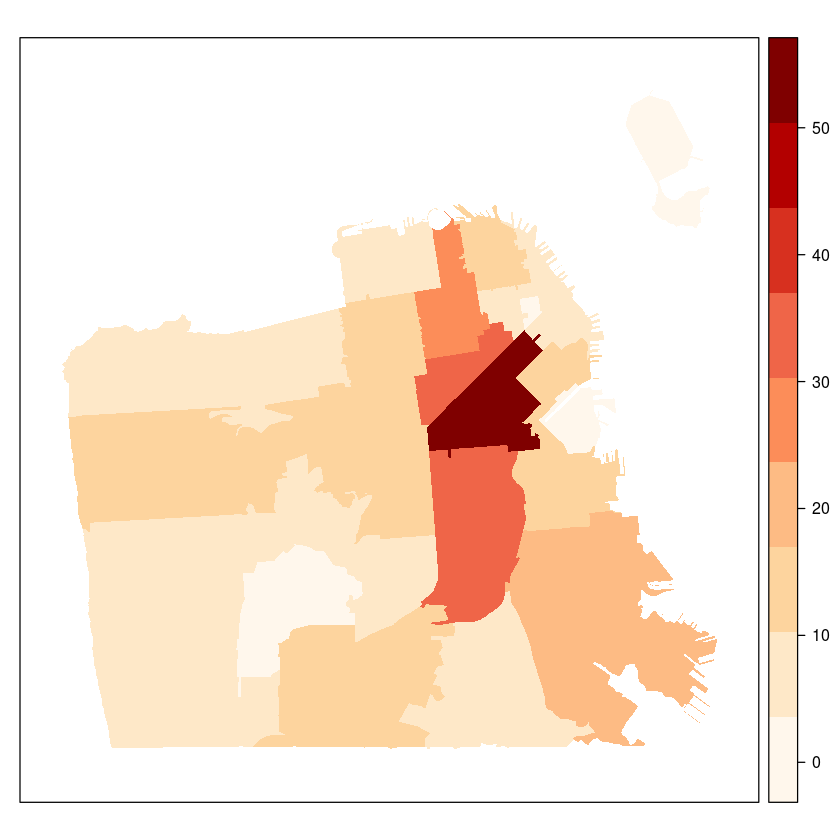

In [38]:
spplot(map, c("Crimes"), cuts=8, col.regions = brewer.pal(n = 9, name = "OrRd"), col="transparent", 
       xlim = c(map@bbox["x", "min"] - 0.01,
                map@bbox["x", "max"] + 0.01),
       ylim = c(map@bbox["y", "min"] - 0.01,
                map@bbox["y", "max"] + 0.01))